## Simple multi-layered-perceptron with Focal Loss criterion

paper reference: https://arxiv.org/pdf/1708.02002.pdf  
**brief explanation on the loss function:** 
- Focal loss is a modified CrossEntropy loss  
- Recall that cross entropy is $CE = \begin{cases}
      -log(p) & \text{if $y$==1}\\
      -log(1-p) & \text{otherwise}\\
    \end{cases} $  
    - for convenience we define $p_t$ to be $p$ when y==1 and $1-p$ otherwise. Therefore $CE = -\log(p_t)$
- A common regularization method to counteract class imbalance from cross entropy would be to put in a regularizer $\alpha \in [0, 1)$ in front  of CE such that the weight of CE is $alpha$ for y==1 and $1-alpha$ otherwise
- researchers published the above mentioned paper stated that 
    - `the large class imbalance encountered during training of dense detectors overwhelms the cross entropy loss. Easily classified negatives comprise the majority of the loss and dominate the gradient. While α balances the importance of positive/negative examples, it does not differentiate between easy/hard examples`
- Therefore, focal loss is postulated with the following formulation
    - $FL = -(\alpha)(1-p_t)^\gamma CE = -(\alpha)(1-p_t)^\gamma \log(p_t)$

In [52]:
# overall utility package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# pytorch library
import torch
from torch import nn
import pandas as pd
# import customm utility packages
from src.FocalLoss import *
from src.custom_dataset import CustomDataset
from src.model import BaseMLP
from src.deployment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
SEED = 666

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# train = pd.read_csv('train.csv')
# stratify_columns = ['y']
# train, val = train_test_split(train, test_size=0.10, stratify=train[stratify_columns], random_state=SEED)
# val.to_csv('validation.csv', index=False)
# train.to_csv('train_subset.csv', index=False)

In [19]:
train = pd.read_csv('train_subset.csv')
val = pd.read_csv('validation.csv')

In [20]:
test = pd.read_csv('hold_out.csv')

In [21]:
test.shape

(38052, 22)

In [22]:
train.shape

(194065, 22)

model is alright after ~10 epochs

hidden layer = (6, 4)

Epoch: 10: Train loss: 0.017021794350678063, Validation loss: 0.017198987095824025
training finished


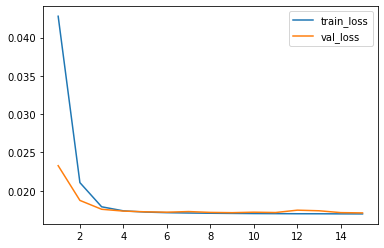

accuracy = 0.9080359935760498
accuracy = 0.9069238901138306


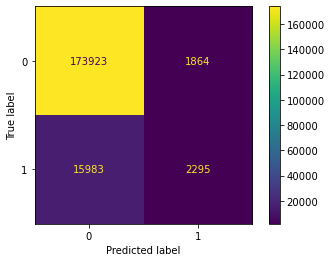

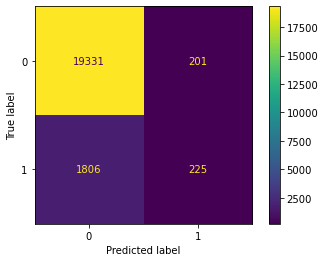

In [63]:
net = mlp_run(train, val, batch_size=32, num_iter=15, gamma=4, gpu=False)

Epoch: 10: Train loss: 0.008683276435349564, Validation loss: 0.00874807806934288
training finished


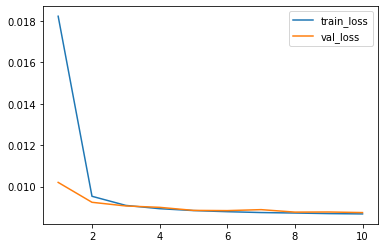

accuracy = 0.908159613609314
accuracy = 0.9067384004592896


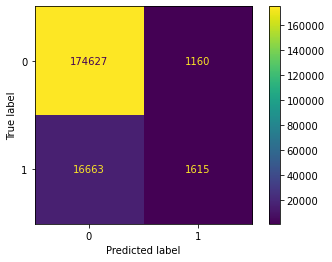

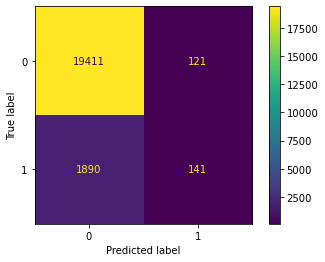

In [65]:
net = mlp_run(train, val, batch_size=32, num_iter=10, gamma=5, gpu=False)

Epoch: 10: Train loss: 0.24640144171455824, Validation loss: 0.24738733957380676
Epoch: 20: Train loss: 0.24245729200597255, Validation loss: 0.24376586488605606
Epoch: 30: Train loss: 0.23996332134231496, Validation loss: 0.2418350137449602
Epoch: 40: Train loss: 0.23871296219595287, Validation loss: 0.24047330916148973
Epoch: 50: Train loss: 0.23811159033792037, Validation loss: 0.2407444493557694
training finished


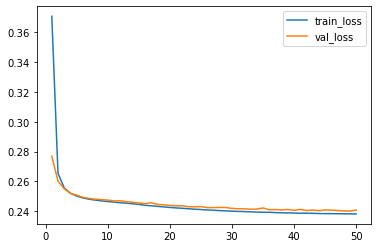

train accuracy = 0.9077937602996826
validation accuracy = 0.9065065383911133


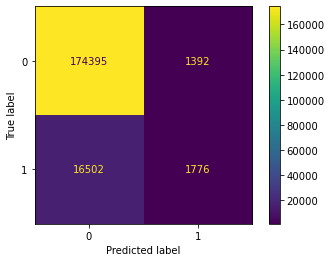

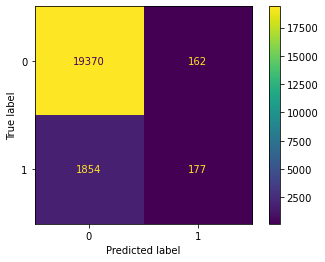

In [66]:
net = mlp_run(train, val, batch_size=32, num_iter=50, criterion = 'ce', gpu=False)

Well shit I'm depressed

Change learning rate to 1e-6 (NOPE)

Add alpha to weighted focal loss

trial 1: alpha=0.1, gamma=2

Epoch: 10: Train loss: 0.021947398264596803, Validation loss: 0.022145338706086315
training finished


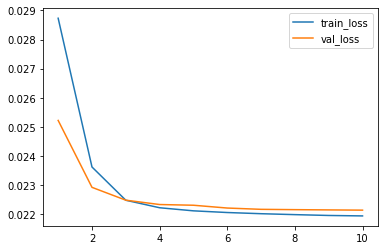

train accuracy = 0.767871618270874
validation accuracy = 0.7651532888412476


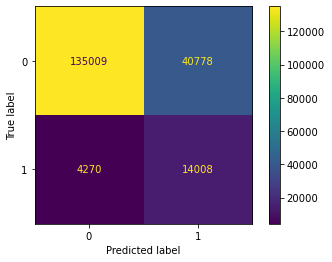

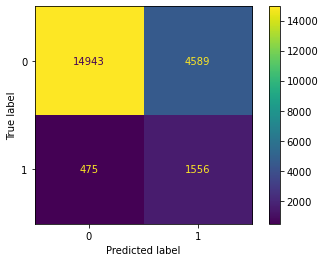

In [73]:
net = mlp_run(train, val, batch_size=32, num_iter=10, lr=1e-4, criterion = 'focal', alpha = 0.1, gamma = 2, gpu=False, return_prediction = False, return_prob=True)

trial2: alpha=0.1, gamma=1 (decrease)

Epoch: 10: Train loss: 0.044316624571482506, Validation loss: 0.04454903832418452
training finished


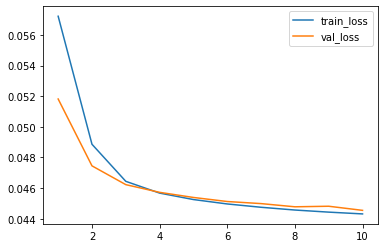

train accuracy = 0.7405972480773926
validation accuracy = 0.738904595375061


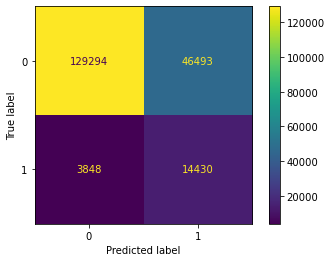

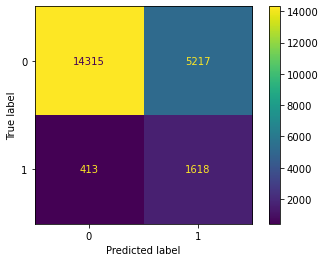

In [75]:
net = mlp_run(train, val, batch_size=32, num_iter=10, lr=1e-4, criterion = 'focal', alpha = 0.1, gamma = 1, gpu=False, return_prediction = False, return_prob=True)

trial3: alpha=0.1, gamma=4 (increase)

Epoch: 10: Train loss: 0.005583164736825085, Validation loss: 0.005631642847236257
training finished


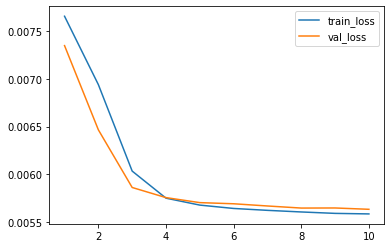

train accuracy = 0.7684693336486816
validation accuracy = 0.764272153377533


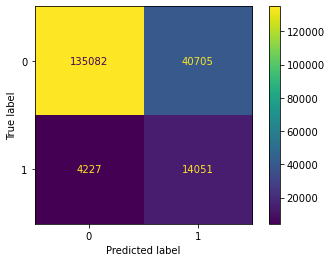

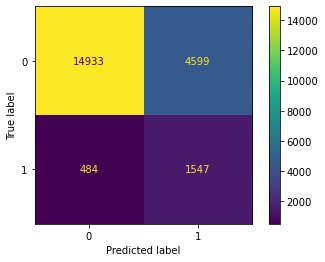

In [76]:
net = mlp_run(train, val, batch_size=32, num_iter=10, lr=1e-4, criterion = 'focal', alpha = 0.1, gamma = 4, gpu=False, return_prediction = False, return_prob=True)

trial4: alpha=0.2 (increase), gamma=4

Epoch: 10: Train loss: 0.007476083066940971, Validation loss: 0.007555651391071519
training finished


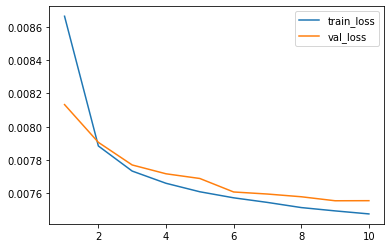

train accuracy = 0.8363332152366638
validation accuracy = 0.8351806402206421


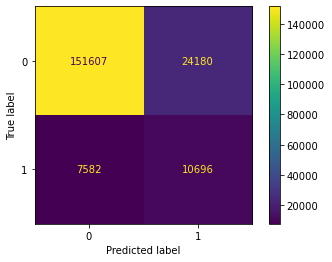

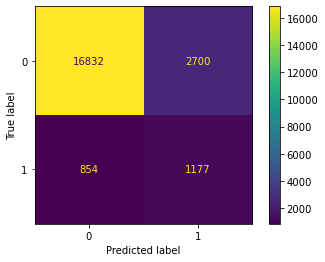

In [77]:
net = mlp_run(train, val, batch_size=32, num_iter=10, lr=1e-4, criterion = 'focal', alpha = 0.2, gamma = 4, gpu=False, return_prediction = False, return_prob=True)

Epoch: 10: Train loss: 0.007390052360318975, Validation loss: 0.007439471724946107
training finished


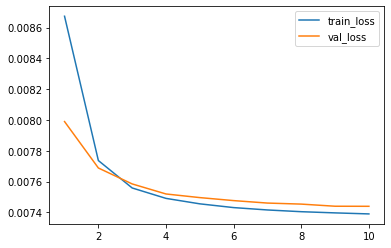

roc-auc = 0.8470969920273997
roc-auc = 0.8432072939073685
train accuracy = 0.8611805438995361
training f1 score = 0.41564357294694376
validation accuracy = 0.8599916696548462
validation f1 score = 0.4100058628102404


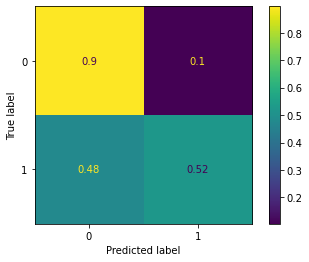

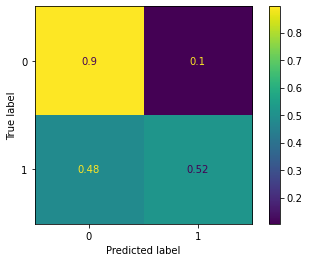

In [81]:
net = mlp_run(train, val, batch_size=32, num_iter=10, lr=1e-4, criterion = 'focal', alpha = 0.2, gamma = 4, gpu=False, return_prediction = False, return_prob=True)

trial5: alpha=0.2, gamma=7 (increase)

Epoch: 10: Train loss: 0.0009507758956971084, Validation loss: 0.0009569613497396129
training finished


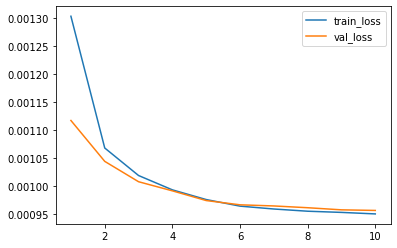

roc-auc = 0.8403688292654544
roc-auc = 0.8356374339252945
train accuracy = 0.8450467586517334
training f1 score = 0.4066612734555356
validation accuracy = 0.8420442342758179
validation f1 score = 0.3978076379066478


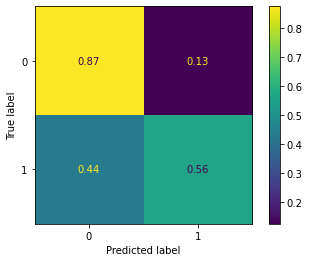

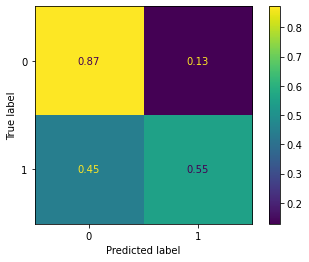

In [88]:
net = mlp_run(train, val, batch_size=32, num_iter=10, lr=1e-4, criterion = 'focal', alpha = 0.2, gamma = 7, gpu=False, return_prediction = False, return_prob=True)

increase num epochs

Epoch: 10: Train loss: 0.000938385986504763, Validation loss: 0.0009448060455220096
Epoch: 20: Train loss: 0.0009335118611953593, Validation loss: 0.0009416465152062625
Epoch: 30: Train loss: 0.0009326792856093315, Validation loss: 0.0009399843865104617
Epoch: 40: Train loss: 0.0009321281225994453, Validation loss: 0.0009393214917595247
Epoch: 50: Train loss: 0.0009317875501368831, Validation loss: 0.0009390450132290835
Epoch: 60: Train loss: 0.0009317829924386443, Validation loss: 0.0009382296949386657
Epoch: 70: Train loss: 0.0009314722455767354, Validation loss: 0.0009389606833690087
Epoch: 80: Train loss: 0.0009309975461608608, Validation loss: 0.0009381138119060347
Epoch: 90: Train loss: 0.0009307309901136413, Validation loss: 0.0009394609318816073
Epoch: 100: Train loss: 0.0009305004078356637, Validation loss: 0.0009426932357640617
training finished


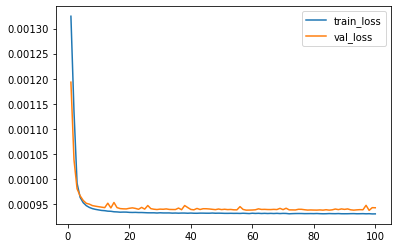

roc-auc = 0.8488114196221466
roc-auc = 0.843952539145195
train accuracy = 0.8597738146781921
training f1 score = 0.41821485836451094
validation accuracy = 0.8581830263137817
validation f1 score = 0.41372699386503065


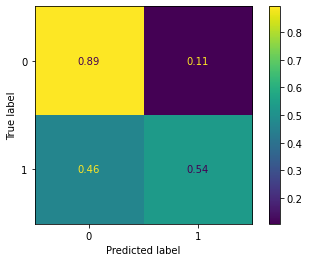

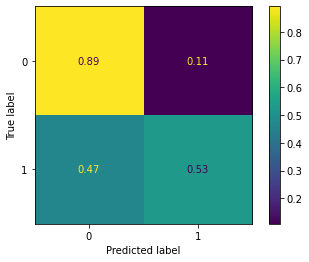

In [87]:
net = mlp_run(train, val, batch_size=32, num_iter=100, lr=1e-4, criterion = 'focal', alpha = 0.2, gamma = 7, gpu=False, return_prediction = False, return_prob=True)

switch to a shallower model with a sigmoid transformation for numeric stability

Epoch: 10: Train loss: 0.0037160461073663, Validation loss: 0.0037501830749630993
Epoch: 20: Train loss: 0.0036995993934607063, Validation loss: 0.0037414965638476326
Epoch: 30: Train loss: 0.003694882181182086, Validation loss: 0.0037323893811304996
Epoch: 40: Train loss: 0.0036894620968580174, Validation loss: 0.003730536614356767
Epoch: 50: Train loss: 0.0036865838342296344, Validation loss: 0.0037261261369822994
Epoch: 60: Train loss: 0.0036852219630906517, Validation loss: 0.003722522545257688
Epoch: 70: Train loss: 0.003684053969356828, Validation loss: 0.003719763344261541
Epoch: 80: Train loss: 0.0036822811465077746, Validation loss: 0.0037257796848118195
Epoch: 90: Train loss: 0.0036816503399804924, Validation loss: 0.003722825926868107
Epoch: 100: Train loss: 0.0036811709638741802, Validation loss: 0.0037240500091050006
training finished


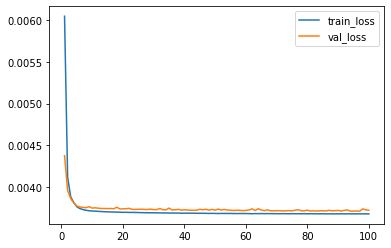

roc-auc = 0.8491426077576242
roc-auc = 0.8442593114124073
train accuracy = 0.8542962670326233
training f1 score = 0.4186199522987088
validation accuracy = 0.852246880531311
validation f1 score = 0.41239395057174477


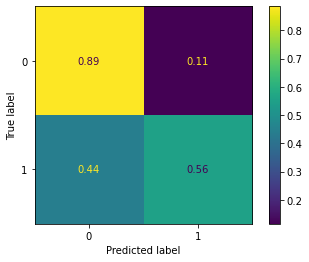

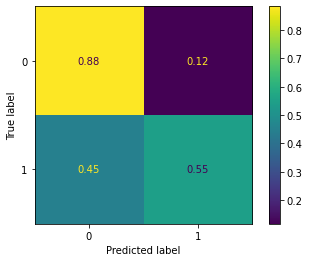

In [86]:
net = mlp_run(train, val, batch_size=32, num_iter=100, lr=1e-4, criterion = 'focal', alpha = 0.2, gamma = 5, gpu=False, return_prediction = False, return_prob=True, model=2)

### Ref
batch size vs training behavior https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e  
paper for focal loss: https://arxiv.org/pdf/1708.02002.pdf